In [1]:
from os import listdir
import numpy as np
from collections import defaultdict
import json
import pandas as pd

In [2]:
def readData(jsonpath):
    global allReviews
    for files,filenumber in zip(listdir(jsonpath),range(len(listdir(jsonpath)))):
        d=json.load(open(jsonpath+files,'r'))
        for review in d['Reviews']:
            userDict={}
            for key0 in review:
                if key0=='Ratings':
                    for key1 in review[key0]:
                        userDict[key1]=review[key0][key1]
                else:
                    userDict[key0]=review[key0]
            userDict['HotelId'] = filenumber
            userDict['ReviewLength'] = len(userDict['Content'])
            allReviews+=[userDict]
        if(filenumber==10):
            break

In [3]:
allReviews = []
print("Reading data...")
readData("TripAdvisorJson\\json\\")
print("Done")

Reading data...
Done


In [4]:
df=pd.DataFrame(allReviews)
del allReviews
print("Length before dropping columns/rows: "+str(len(df)))
try:
  df=df.drop(['Check in / front desk', 'Business service (e.g., internet access)','Business service', 'ReviewID', 'Sleep Quality'], axis=1)
except ValueError:
  df=df.drop(['Check in / front desk', 'ReviewID'], axis=1)
df.head(5)
df = df.dropna(axis=0, how='any')
print("Length after dropping columns/rows with NaNs: "+str(len(df)))

Length before dropping columns/rows: 1772
Length after dropping columns/rows with NaNs: 1289


In [5]:
df.head(5)

,Author,AuthorLocation,Cleanliness,Content,Date,HotelId,Location,Overall,ReviewLength,Rooms,Service,Title,Value
0,Nadine R,"Jacksonville, Florida",5,"Usually stay near the airport, but this trip w...","April 19, 2012",0,5,5.0,578,5,5,“Great place and location”,5
1,blt3116,"Chillicothe, Ohio",4,Stayed at this Hilton for 2 nights. It was lik...,"January 30, 2012",0,5,4.0,298,4,4,"“Nice stay, nice surroundings”",4
2,ExSpec5,Northern Virginia,5,"Stayed there one night, December 16, on the wa...","December 28, 2011",0,5,4.0,454,5,5,“Perfect for an overnight just off I-95”,3
3,kevinlynch3,Raleigh,5,I just stayed here last weekend and have alrea...,"December 23, 2011",0,5,5.0,1213,5,5,“Great Hotel”,4
4,nobumponalog,"Belmont, MA",5,My mother who is 90 and I stayed one night on ...,"October 14, 2011",0,5,5.0,430,5,5,“good room for handicapped person”,4


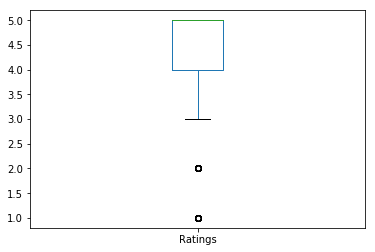

array(['5.0', '4.0', '1.0', '3.0', '2.0'], dtype=object)

In [6]:
import matplotlib.pyplot as plt
scores = pd.DataFrame({"Ratings":df["Overall"].astype(np.float)})
scores.plot.box()
plt.show()
df["Overall"].unique()

In [7]:
import seaborn as sns

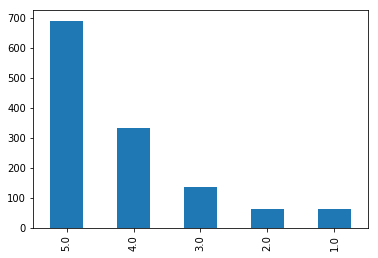

In [8]:
fig, ax = plt.subplots()
df['Overall'].value_counts().plot(ax=ax, kind='bar')
plt.show()

In [53]:
df['Overall'].value_counts()
def getFreqCount(colName):
    print(colName)
    li = {}
    for (value,freq) in zip(df[colName].value_counts().index.tolist(),df[colName].value_counts()):
        li[value] = freq
    print(li)
    return li

In [32]:
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf

In [34]:
df.columns

Index(['Author', 'AuthorLocation', 'Cleanliness', 'Content', 'Date', 'HotelId',
       'Location', 'Overall', 'ReviewLength', 'Rooms', 'Service', 'Title',
       'Value'],
      dtype='object')

Overall
{'5.0': 691, '4.0': 334, '3.0': 137, '2.0': 64, '1.0': 63}
Overall
{'5.0': 691, '4.0': 334, '3.0': 137, '2.0': 64, '1.0': 63}
Cleanliness
{'5': 835, '4': 269, '3': 97, '1': 49, '2': 39}
Service
{'5': 798, '4': 244, '3': 123, '1': 67, '2': 57}
Rooms
{'5': 672, '4': 348, '3': 139, '2': 71, '1': 59}
Location
{'5': 949, '4': 240, '3': 79, '2': 13, '1': 8}
Value
{'5': 566, '4': 403, '3': 165, '2': 79, '1': 76}


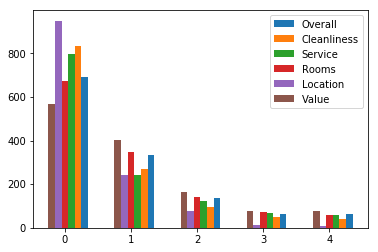

In [76]:
def plotFreqCounts(cols):
    l = len(getFreqCount(cols[0]))
    X = np.arange(l)
    ax = plt#.subplot(111)
    for i in range(len(cols)):
        mult = 1
        if(i%2==0):
            mult = 1
        ax.bar(X+len(cols)*0.1/2-(mult*i*0.1), getFreqCount(cols[i]).values(), width=0.1, align='center')
    ax.legend(cols)
    #ax.autoscale(tight=False)
    ax.figure(figsize=(20,20))
    ax.show()
plotFreqCounts(['Overall', 'Cleanliness', 'Service', 'Rooms', 'Location', 'Value'])

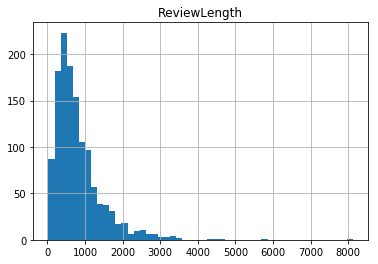

In [85]:
import matplotlib.pyplot as plt

%matplotlib inline
df.hist(column='ReviewLength', bins=50)
plt.figure(figsize=(20,3))
plt.show()

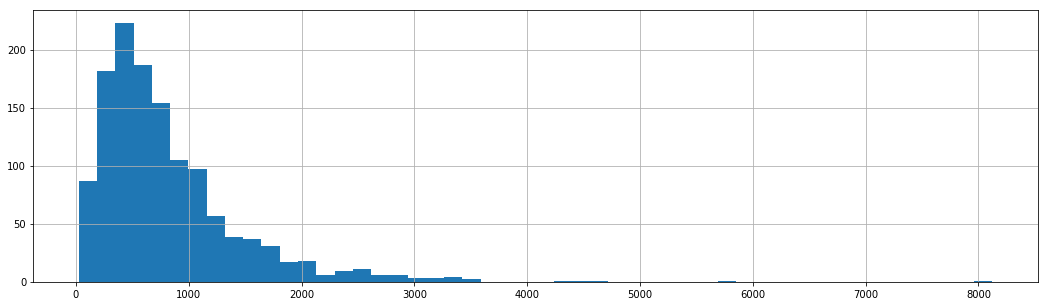

In [96]:
df['ReviewLength'].hist(figsize=(18, 5), bins=50)

In [37]:
int('1'*5)

11111

In [50]:
df['Service'].value_counts()

5    798
4    244
3    123
1     67
2     57
Name: Service, dtype: int64